In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('onlinefraud.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            29999 non-null  int64  
 1   type            29999 non-null  object 
 2   amount          29999 non-null  float64
 3   nameOrig        29999 non-null  object 
 4   oldbalanceOrg   29999 non-null  float64
 5   newbalanceOrig  29999 non-null  float64
 6   nameDest        29999 non-null  object 
 7   oldbalanceDest  29999 non-null  float64
 8   newbalanceDest  29999 non-null  float64
 9   isFraud         29999 non-null  int64  
 10  isFlaggedFraud  29999 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 2.5+ MB


In [4]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,29999.000000,2.999900e+04,2.999900e+04,2.999900e+04,2.999900e+04,2.999900e+04,29999.000000,29999.0
mean,6.592886,1.376175e+05,8.663811e+05,8.830128e+05,8.633587e+05,1.193738e+06,0.002800,0.0
std,2.251748,3.033903e+05,2.495434e+06,2.534949e+06,2.541712e+06,3.104404e+06,0.052843,0.0
min,1.000000,1.770000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,7.000000,6.078200e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,8.000000,2.075662e+04,2.005100e+04,4.248560e+03,0.000000e+00,0.000000e+00,0.000000,0.0
75%,8.000000,1.623476e+05,1.522230e+05,1.569310e+05,3.918643e+05,7.033162e+05,0.000000,0.0
max,8.000000,1.000000e+07,2.854724e+07,2.861740e+07,2.861740e+07,2.878359e+07,1.000000,0.0


In [12]:
#jo jo objects hai
obj = (data.dtypes == 'object')
# obj
object_cols = list(obj[obj].index)
# object_cols
print("Categorical variables: ", len(object_cols))

Categorical variables:  3


In [13]:
#jo jo integers hai
intpeople = (data.dtypes == 'int')
num_cols = list(intpeople[intpeople].index)
print("Integer variables: ", len(num_cols))

#jo jo floats hai
fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables: ", len(fl_cols))

Integer variables:  0
Float variables:  5


<Axes: xlabel='type', ylabel='count'>

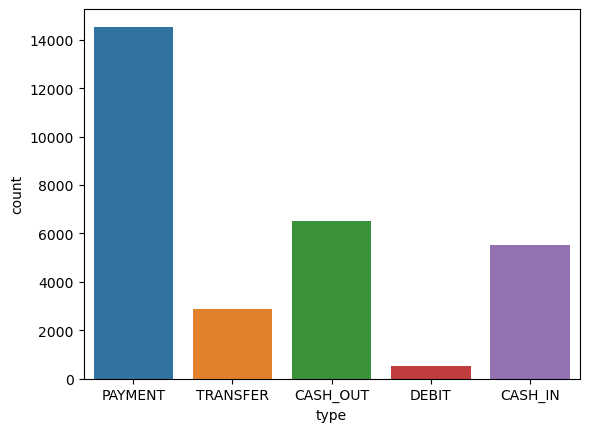

In [16]:
sns.countplot(x='type', data=data)

<Axes: xlabel='type', ylabel='amount'>

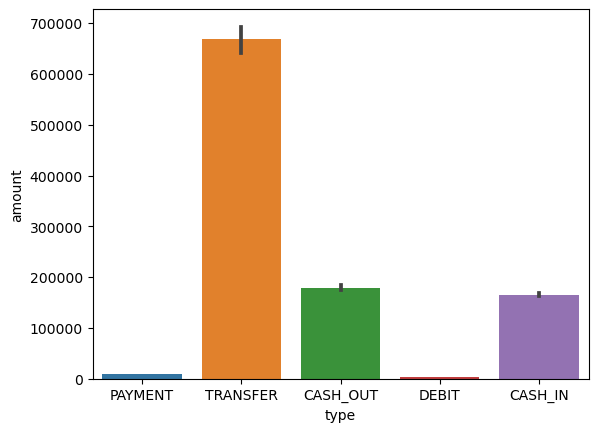

In [17]:
sns.barplot(x='type', y='amount', data=data)

In [18]:
data['isFraud'].value_counts()

isFraud
0    29915
1       84
Name: count, dtype: int64

C:\Users\lovis\AppData\Local\Temp\ipykernel_9024\1113131929.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['step'], bins=50)
C:\Users\lovis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='step', ylabel='Density'>

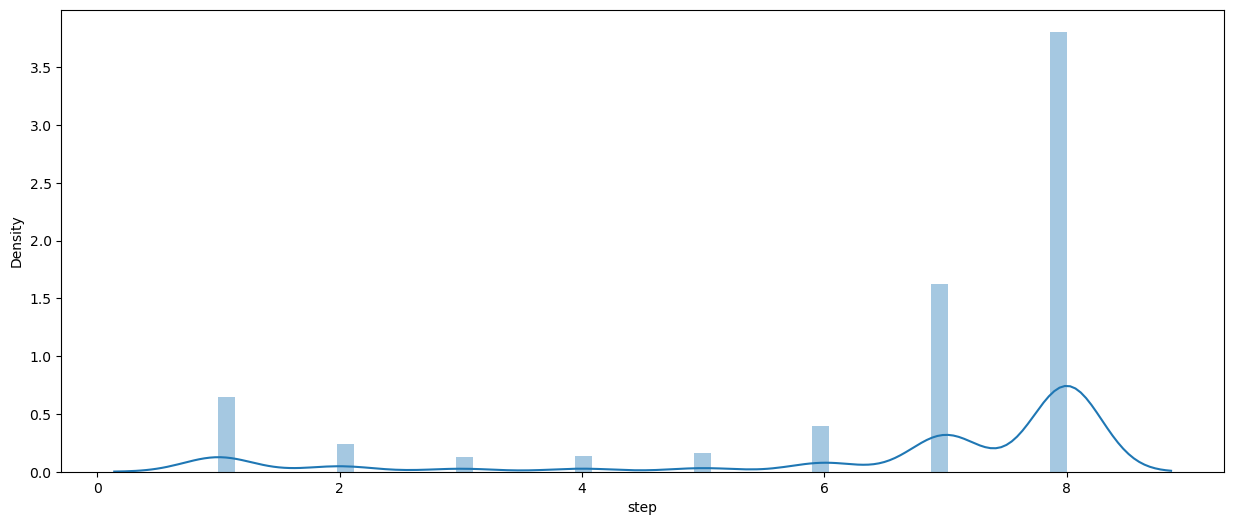

In [25]:
plt.figure(figsize=(15, 6))
sns.distplot(data['step'], bins=50)

C:\Users\lovis\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

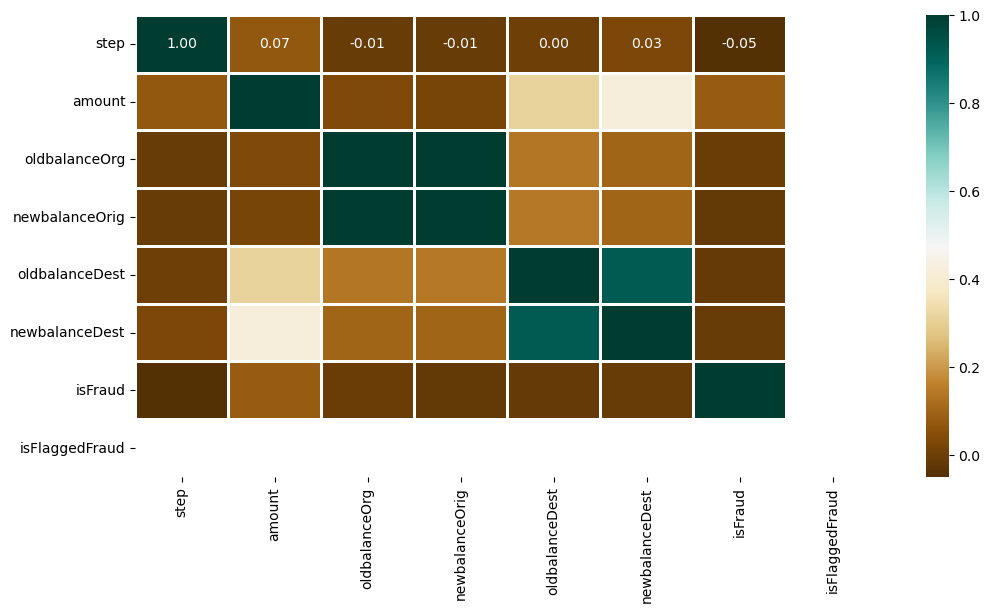

In [28]:
dataX= data.drop(columns=['type','nameOrig','nameDest'])
plt.figure(figsize=(12, 6))
sns.heatmap(dataX.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

In [30]:
type_new = pd.get_dummies(data['type'], drop_first=True)
data_new = pd.concat([data, type_new], axis=1)
data_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,False,False,True,False
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,False,False,True,False
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,False,False,False,True
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,True,False,False,False
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,False,False,True,False


In [33]:
x = data_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = data_new['isFraud']
 
X.shape, y.shape

((29999, 11), (29999,))

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [39]:
# !pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score as ras
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [40]:
models = [LogisticRegression(), XGBClassifier(),
          SVC(kernel='rbf', probability=True),
          RandomForestClassifier(n_estimators=7,
                                 criterion='entropy', 
                                 random_state=7)]
 
for i in range(len(models)):
    models[i].fit(X_train, y_train)
    print(f'{models[i]} : ')
     
    train_preds = models[i].predict_proba(X_train)[:, 1]
    print('Training Accuracy : ', ras(y_train, train_preds))
     
    y_preds = models[i].predict_proba(X_test)[:, 1]
    print('Validation Accuracy : ', ras(y_test, y_preds))
    print()

LogisticRegression() : 
Training Accuracy :  0.9455426634197583
Validation Accuracy :  0.9541788739570729

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  0.9738571587796956

SVC(probability=True) : 
Training Accuracy :  0.9313041861924543

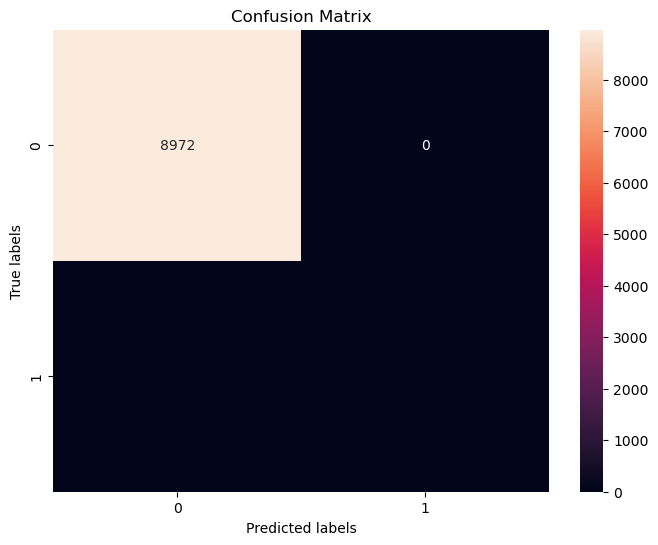

In [56]:
from sklearn.metrics import confusion_matrix
# Assuming you have already trained your model and have predictions
# models[1].fit(X_train, y_train)
y_pred = models[1].predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()